## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

def getEarlyStopping(mpatience):

    earlystop = EarlyStopping(monitor="val_loss", 
                          patience=mpatience, 
                          verbose=1
                          )
    return earlystop

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in range(2):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    if i==0:
        earlystop = getEarlyStopping(10)
    else:
        earlystop = getEarlyStopping(25)
        
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
         )
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = i
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0806 21:15:45.223331  3744 deprecation_wrapper.py:119] From C:\Users\Win7\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0806 21:15:45.252333  3744 deprecation_wrapper.py:119] From C:\Users\Win7\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0806 21:15:45.412342  3744 deprecation_wrapper.py:119] From C:\Users\Win7\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 21:15:45.416342  3744 deprecation_wrapper.py:119] From C:\Users\Win7\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 21:15:45.440343  3744 depr

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

W0806 21:15:46.157384  3744 deprecation.py:323] From C:\Users\Win7\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 211us/step - loss: 2.2308 - acc: 0.2600 - val_loss: 2.1590 - val_acc: 0.3184
Epoch 2/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.7497 - acc: 0.3884 - val_loss: 1.8426 - val_acc: 0.3814
Epoch 3/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.6255 - acc: 0.4290 - val_loss: 1.6993 - val_acc: 0.4142
Epoch 4/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5536 - acc: 0.4557 - val_loss: 1.6231 - val_acc: 0.4349
Epoch 5/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.4999 - acc: 0.4747 - val_loss: 1.6037 - val_acc: 0.4417
Epoch 6/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.4576 - acc: 0.4901 - val_loss: 1.5602 - val_acc: 0.4506
Epoch 7/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.4186 - acc: 0.5041 - val_loss: 1.

Epoch 18/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.1022 - acc: 0.6223 - val_loss: 1.4445 - val_acc: 0.4978
Epoch 19/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.0814 - acc: 0.6285 - val_loss: 1.4338 - val_acc: 0.5002
Epoch 20/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.0593 - acc: 0.6382 - val_loss: 1.4398 - val_acc: 0.4982
Epoch 21/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.0406 - acc: 0.6438 - val_loss: 1.4485 - val_acc: 0.4954
Epoch 22/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.0181 - acc: 0.6533 - val_loss: 1.4380 - val_acc: 0.4987
Epoch 23/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.9976 - acc: 0.6623 - val_loss: 1.4819 - val_acc: 0.4891
Epoch 24/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.9768 - acc: 0.6679 - val_loss: 1.4641 - val_acc: 0.4941
Epoch 25/50
50000/50000

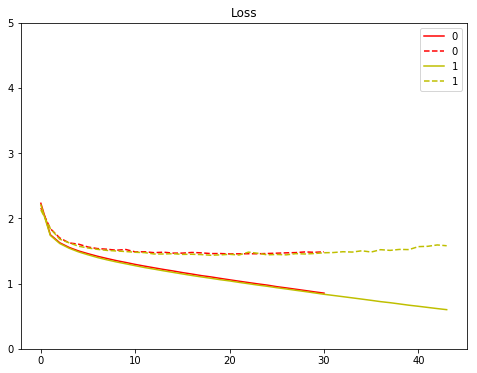

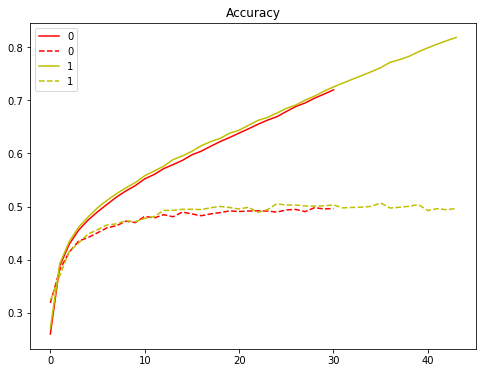

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()